# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve


# ColumnTransformer
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),  # Grab all string columns
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))  # Grab all numerical columns
    ],
    remainder="passthrough"
)

# Preprocessing
X = penguins.drop('species', axis=1)
y = penguins['species']
processed_features = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    processed_features, y, test_size=0.2, stratify=y, random_state=42
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
# Training kNN model with k=3
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train, y_train)

y_pred = knn_model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, knn_model1.predict_proba(X_test), multi_class='ovr')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pr:.4f}")
print(f"Recall: {re:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}\n")

Confusion Matrix:
 [[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]
Accuracy: 0.9701
Precision: 0.9701
Recall: 0.9701
F1-Score: 0.9701
AUC: 0.9992



In [34]:
# Training kNN model with k=6
knn_model2 = KNeighborsClassifier(n_neighbors=6)
knn_model2.fit(X_train, y_train)

y_pred = knn_model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, knn_model2.predict_proba(X_test), multi_class='ovr')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pr:.4f}")
print(f"Recall: {re:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}\n")

Confusion Matrix:
 [[29  0  0]
 [ 1 13  0]
 [ 0  0 24]]
Accuracy: 0.9851
Precision: 0.9856
Recall: 0.9851
F1-Score: 0.9849
AUC: 0.9996



In [35]:
# Training Decision Tree models with max depth 3
dt_model1 = DecisionTreeClassifier(max_depth=3)
dt_model1.fit(X_train, y_train)

y_pred = dt_model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, dt_model1.predict_proba(X_test), multi_class='ovr')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pr:.4f}")
print(f"Recall: {re:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}\n")

Confusion Matrix:
 [[29  0  0]
 [ 1 13  0]
 [ 2  0 22]]
Accuracy: 0.9552
Precision: 0.9594
Recall: 0.9552
F1-Score: 0.9554
AUC: 0.9681



In [36]:
# Training Decision Tree models with different complexities
dt_model2 = DecisionTreeClassifier(max_depth=None)
dt_model2.fit(X_train, y_train)

y_pred = dt_model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, dt_model2.predict_proba(X_test), multi_class='ovr')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pr:.4f}")
print(f"Recall: {re:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}\n")

Confusion Matrix:
 [[29  0  0]
 [ 0 14  0]
 [ 2  0 22]]
Accuracy: 0.9701
Precision: 0.9721
Recall: 0.9701
F1-Score: 0.9700
AUC: 0.9773



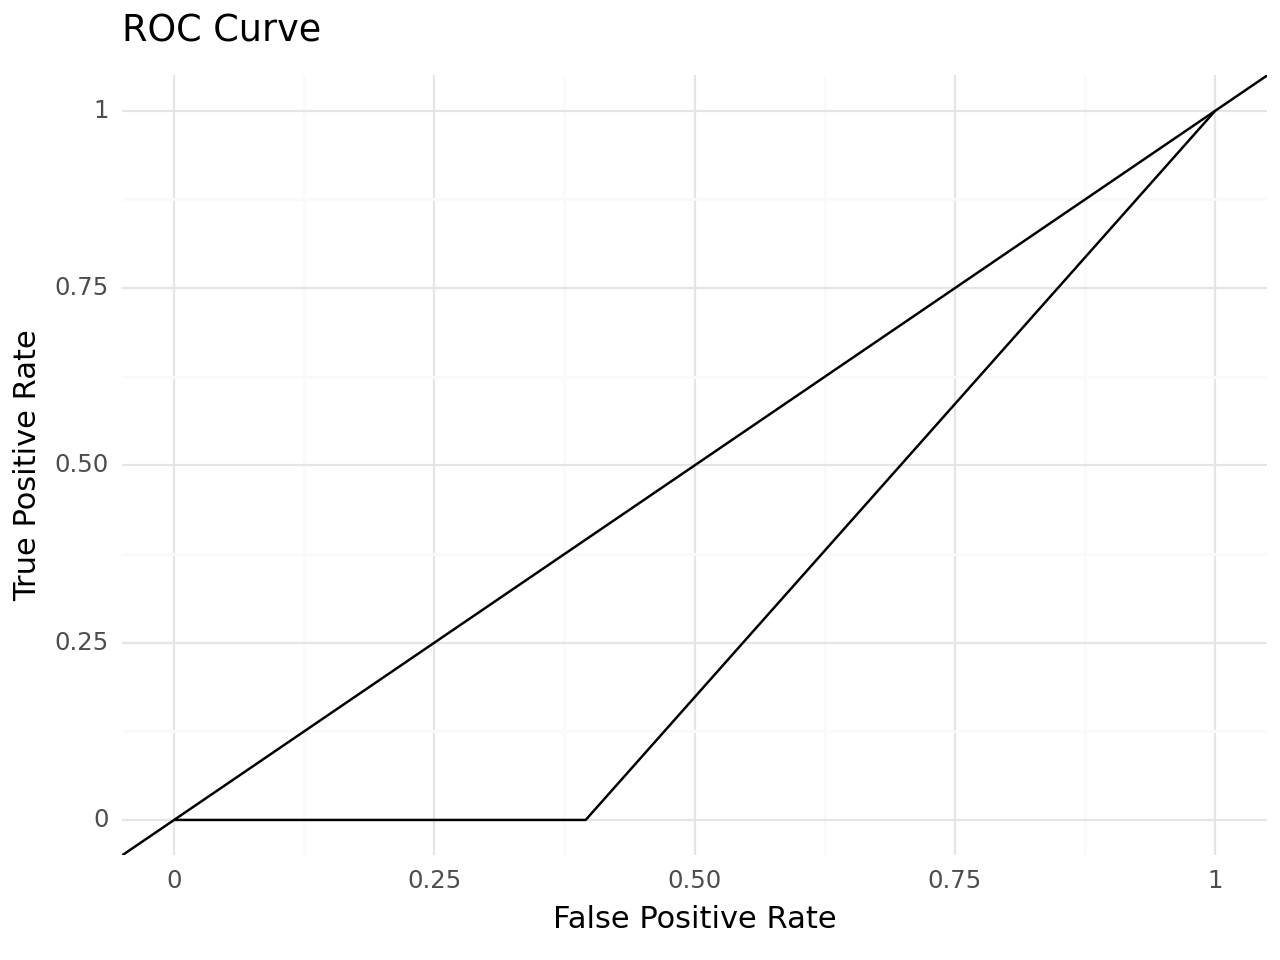

<Figure Size: (640 x 480)>

In [40]:
y_test_bin = (y_test == penguins['species'].unique()[1]).astype(int)
y_score = knn_model2.predict_proba(X_test)[:, 1]

from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal

# Calculate the FPR and TPR for the ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_score)

roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

# Plotting the ROC curve
roc_plot = (ggplot(roc_data, aes(x='FPR', y='TPR')) +
            geom_line() +
            geom_abline() +
            labs(x='False Positive Rate', y='True Positive Rate', title='ROC Curve') +
            theme_minimal())
roc_plot